# Exploratory Data Analysis

In [2]:
import pandas as pd


In [3]:
# file_dataset = "df_processed.csv"
# file_dataset = "df_processed_sentimentValue.csv"
file_dataset = "df_processed_sentimentValue_isSatisfy.csv"

In [4]:
df = pd.read_csv (file_dataset)

In [5]:
df.head()

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,_id,Unnamed: 2,Id,ProductId,UserId,ProfileName,...,Score,Time,Summary,Text,ProductURL,Year,Month,Day,sentiment-value,is-satisfy
0,0,0,0,0,660136d21ab34c5dcc314932,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,...,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,https://www.amazon.com/dp/B000UA0QIQ,2011,6,13,0.082143,0
1,1,1,1,1,660136d21ab34c5dcc314934,6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,...,5,2012-06-20,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,https://www.amazon.com/dp/B006K2ZZ7K,2012,6,20,-0.715137,0
2,2,2,2,2,660136d21ab34c5dcc314935,7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,...,5,2012-05-03,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,https://www.amazon.com/dp/B006K2ZZ7K,2012,5,3,0.400926,0
3,3,3,3,3,660136d21ab34c5dcc314938,9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,...,5,2012-10-26,Healthy Dog Food,This is a very healthy dog food. Good for thei...,https://www.amazon.com/dp/B00171APVA,2012,10,26,0.704783,0
4,4,4,4,4,660136d21ab34c5dcc31493d,13,14,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",...,4,2010-11-05,fresh and greasy!,good flavor! these came securely packed... the...,https://www.amazon.com/dp/B001GVISJM,2010,11,5,0.844037,0


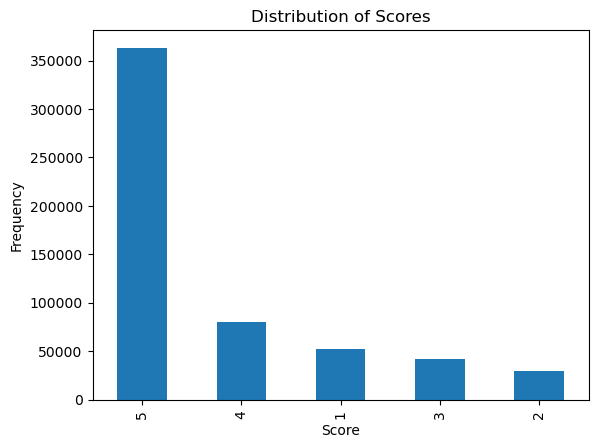

In [6]:
#Cuando este el Sentimental Analysis, ver la columna de isSatisfy y poner un rango de % que se considera "satisfecho" e "insatisfecho"y modificar de acuerdo a eso (pedirle a Jaime que haga el codigo)
#De ese isSatifsy hacer mas graficos
#Entonces ahora hay que definir los % e implementar eso al resto del codigo


#EXPLORATORY ANALYSIS: Conduct EDA to understand the dataset's characteristics:

#Sentiment Distribution: How many reviews are positive, neutral, and negative?
#Score Distribution: What is the average score? How do scores distribute?
#Review Volume Over Time: Any trends in review counts over time?
#Reviewer Engagement: Identify top reviewers and their impact.


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file_dataset)
df['Score'].value_counts().plot(kind='bar')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


Descriptive Statistics for Scores:
count    568377.000000
mean          4.183273
std           1.310394
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Descriptive Statistics for Sentiment Values:
count    568377.000000
mean         -0.000108
std           0.577881
min          -0.999994
25%          -0.501429
50%          -0.001429
75%           0.502184
max           1.000000
Name: sentiment-value, dtype: float64


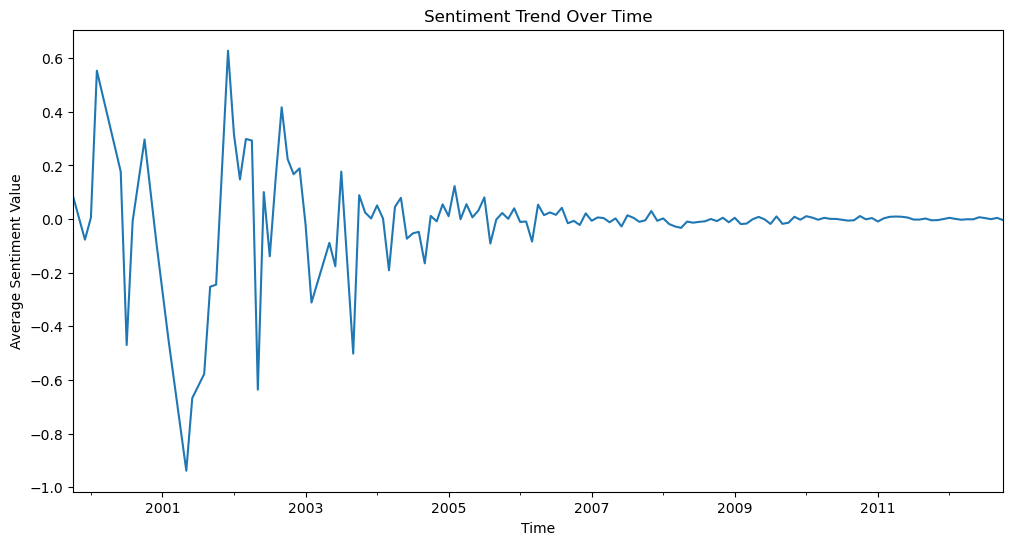


Correlation Matrix:
                    Score  sentiment-value  Review_Length
Score            1.000000        -0.001192      -0.077376
sentiment-value -0.001192         1.000000      -0.000989
Review_Length   -0.077376        -0.000989       1.000000

Mean Squared Error: 1.7077697851137565

Regression Coefficients:
                 Coefficient
sentiment-value    -0.001749
Review_Length      -0.101775


In [7]:
#QUANTITATIVE ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Convert 'Time' to datetime and create a 'Review_Length' column
df['Time'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str))
df['Review_Length'] = df['Text'].apply(len)

# Descriptive Statistics
print("Descriptive Statistics for Scores:")
print(df['Score'].describe())

print("\nDescriptive Statistics for Sentiment Values:")
print(df['sentiment-value'].describe())


# Trend Analysis
# Assuming you want to analyze trends by month and year
df['YearMonth'] = df['Time'].dt.to_period('M')
monthly_sentiment = df.groupby('YearMonth')['sentiment-value'].mean()
monthly_scores = df.groupby('YearMonth')['Score'].mean()

plt.figure(figsize=(12, 6))
monthly_sentiment.plot(title='Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Value')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Score', 'sentiment-value', 'Review_Length']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



#!!!!!!!!!!!!!!!!!!!!!
#HACER O NO?????
# Regression Analysis
# Predicting Score based on sentiment-value and Review_Length
X = df[['sentiment-value', 'Review_Length']]
y = df['Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)

# Regression Coefficients
print("\nRegression Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Descriptive Statistics for Scores:
count    568377.000000
mean          4.183273
std           1.310394
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

Descriptive Statistics for Sentiment Values:
count    568377.000000
mean         -0.000108
std           0.577881
min          -0.999994
25%          -0.501429
50%          -0.001429
75%           0.502184
max           1.000000
Name: sentiment-value, dtype: float64


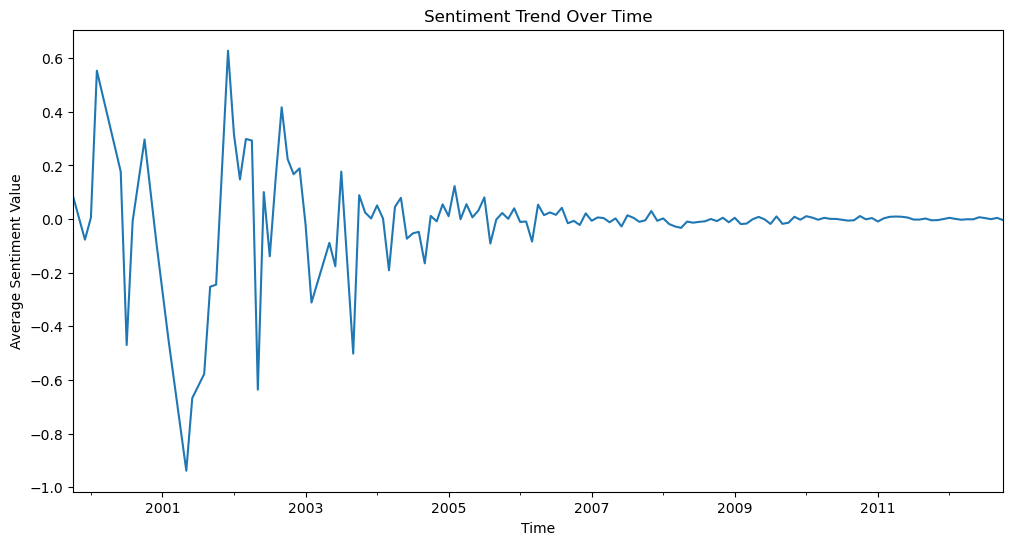


Correlation Matrix:
                    Score  sentiment-value  Review_Length
Score            1.000000        -0.001192      -0.077376
sentiment-value -0.001192         1.000000      -0.000989
Review_Length   -0.077376        -0.000989       1.000000

Mean Squared Error: 1.7077697851137565

Regression Coefficients:
                 Coefficient
sentiment-value    -0.001749
Review_Length      -0.101775


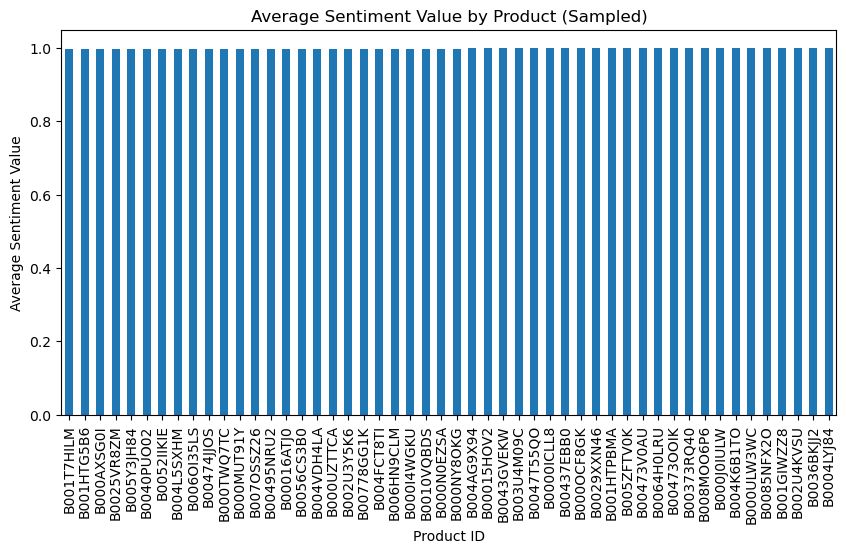

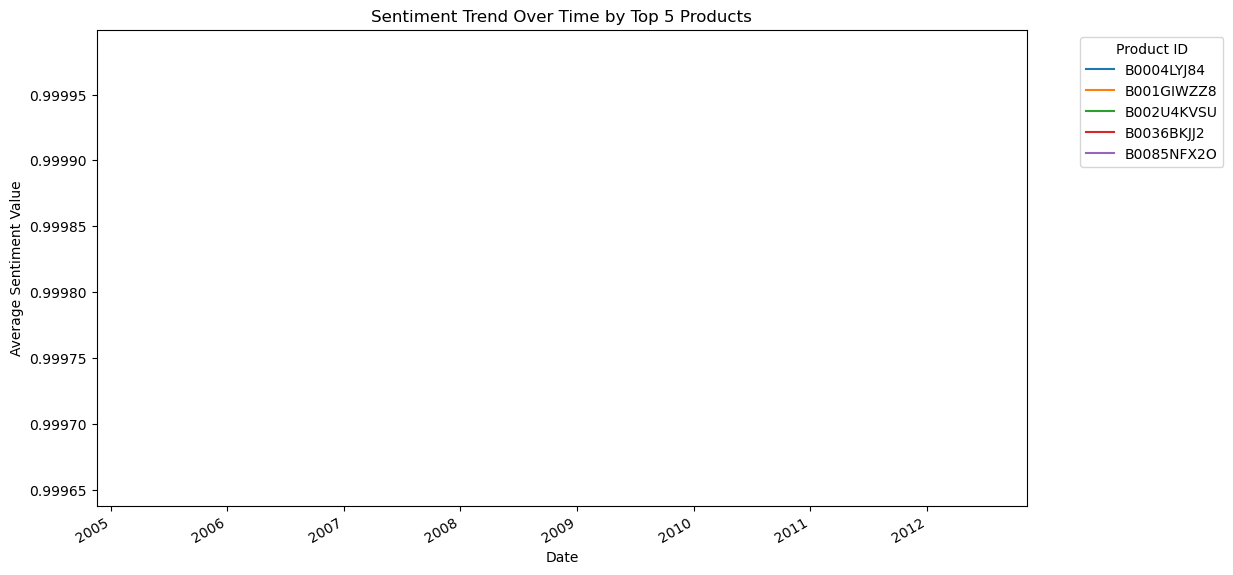

Reviews for product B0004LYJ84:
32008    Pre-maid pudding seems to come in a couple of ...
Name: Text, dtype: object
Reviews for product B0036BKJJ2:
357561    So excited to fins someone on Amazon had this ...
Name: Text, dtype: object
Reviews for product B002U4KVSU:
302884    as a pet-sitter, I give these to clients;  the...
Name: Text, dtype: object
Reviews for product B001GIWZZ8:
486759    The basket was the perfect sympathy gift when ...
Name: Text, dtype: object
Reviews for product B0085NFX2O:
6103    Grilled out brats, chicken, and burgers for th...
Name: Text, dtype: object


In [9]:
# #Para entender mejor el grafico de arriba, separar por segmentos y ver como varia ahi

# # Group the data by 'ProductId' and calculate the mean sentiment value for each product
# product_sentiment = df.groupby('ProductId')['sentiment-value'].mean().sort_values()

# # If you have category information, replace 'ProductId' with 'CategoryColumn'
# # category_sentiment = df.groupby('CategoryColumn')['sentiment-value'].mean().sort_values()
# import matplotlib.pyplot as plt

# # Plot the mean sentiment value for each product
# product_sentiment.plot(kind='bar', figsize=(10, 5))
# plt.title('Average Sentiment Value by Product')
# plt.xlabel('Product ID')
# plt.ylabel('Average Sentiment Value')
# plt.show()

# # If you used category sentiment, replace 'product_sentiment' with 'category_sentiment' in the plot code
# # If you want to see how sentiment for each product changes over time
# product_sentiment_over_time = df.groupby(['ProductId', pd.Grouper(freq='M')])['sentiment-value'].mean()

# # Unstack the multi-index to prepare for plotting
# product_sentiment_over_time = product_sentiment_over_time.unstack(level=0)

# # Plot the sentiment trend over time for each product
# product_sentiment_over_time.plot(figsize=(12, 7))
# plt.title('Sentiment Trend Over Time by Product')
# plt.xlabel('Date')
# plt.ylabel('Average Sentiment Value')
# plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


# # Further investigate these products by reading their reviews, identifying common themes, etc.
# for product_id in top_products.index:
#     print(f"Reviews for product {product_id}:")
#     print(df[df['ProductId'] == product_id]['Text'])



# NEW OPTION CODE (EL DE ARRIBA Y ABAJO JUNTOS)
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame loaded with necessary data
# Ensure correct data types and preprocessing
df['Time'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-' + df['Day'].astype(str))
df['Review_Length'] = df['Text'].apply(len)

# Descriptive Statistics
print("Descriptive Statistics for Scores:")
print(df['Score'].describe())

print("\nDescriptive Statistics for Sentiment Values:")
print(df['sentiment-value'].describe())

# Trend Analysis
df['YearMonth'] = df['Time'].dt.to_period('M')
monthly_sentiment = df.groupby('YearMonth')['sentiment-value'].mean()
monthly_scores = df.groupby('YearMonth')['Score'].mean()

plt.figure(figsize=(12, 6))
monthly_sentiment.plot(title='Sentiment Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Value')
plt.show()

# Correlation Analysis
correlation_matrix = df[['Score', 'sentiment-value', 'Review_Length']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Regression Analysis
X = df[['sentiment-value', 'Review_Length']]
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("\nRegression Coefficients:")
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Plotting average sentiment by product with reduced data complexity
# Sample a manageable number of products to display
sampled_product_sentiment = df.groupby('ProductId')['sentiment-value'].mean().nlargest(50).sort_values()
sampled_product_sentiment.plot(kind='bar', figsize=(10, 5))
plt.title('Average Sentiment Value by Product (Sampled)')
plt.xlabel('Product ID')
plt.ylabel('Average Sentiment Value')
plt.show()

# Plotting sentiment trend over time for each product, simplified by focusing on the top 5 products
top_products = df.groupby('ProductId')['sentiment-value'].mean().nlargest(5)
product_sentiment_over_time = df[df['ProductId'].isin(top_products.index)].groupby(['ProductId', pd.Grouper(key='Time', freq='M')])['sentiment-value'].mean().unstack(level=0)
product_sentiment_over_time.plot(figsize=(12, 7))
plt.title('Sentiment Trend Over Time by Top 5 Products')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Value')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Further investigation by product ID
for product_id in top_products.index:
    print(f"Reviews for product {product_id}:")
    print(df[df['ProductId'] == product_id]['Text'].head())  # Display only first few reviews to prevent overload




        Unnamed: 0.3   Unnamed: 0.2   Unnamed: 0.1     Unnamed: 0  \
count  568377.000000  568377.000000  568377.000000  568377.000000   
mean   284188.000000  284188.000000  284225.016118  284225.016118   
min         0.000000       0.000000       0.000000       0.000000   
25%    142094.000000  142094.000000  142112.000000  142112.000000   
50%    284188.000000  284188.000000  284220.000000  284220.000000   
75%    426282.000000  426282.000000  426339.000000  426339.000000   
max    568376.000000  568376.000000  568453.000000  568453.000000   
std    164076.451313  164076.451313  164099.565462  164099.565462   

          Unnamed: 2             Id  HelpfulnessNumerator  \
count  568377.000000  568377.000000         568377.000000   
mean   284225.012998  284226.012998              1.743964   
min         0.000000       1.000000              0.000000   
25%    142112.000000  142113.000000              0.000000   
50%    284220.000000  284221.000000              0.000000   
75%    42633

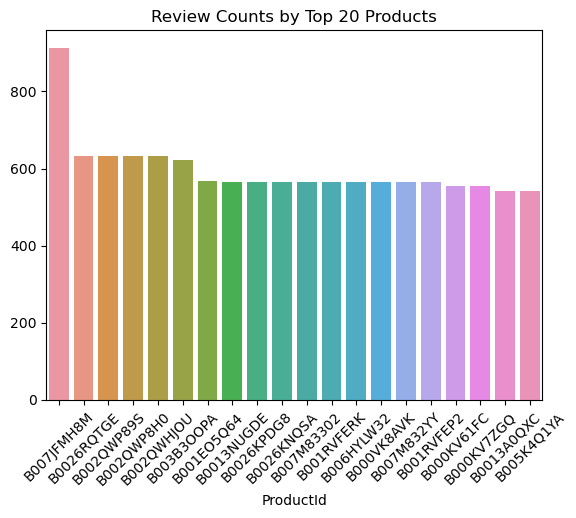

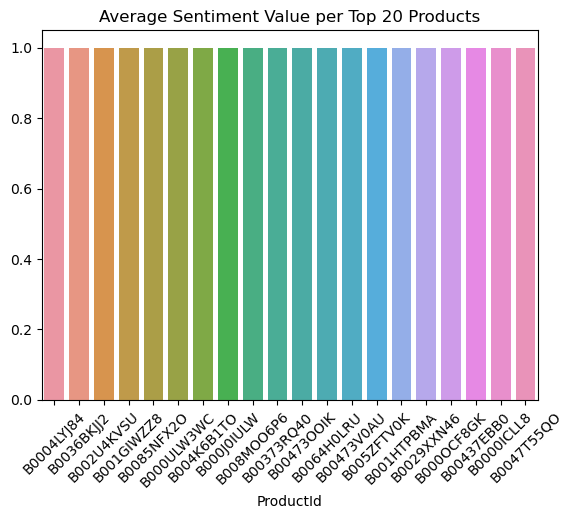

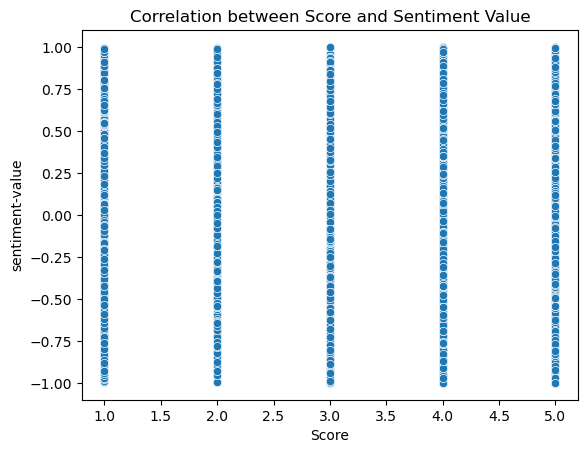

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the dataset
print(df.describe())  # Basic statistics
print(df['Score'].value_counts())  # Score distribution

# Review counts by product
review_counts = df['ProductId'].value_counts()
# To avoid performance issues, limit to the top 20 products
top_review_counts = review_counts.nlargest(20)
sns.barplot(x=top_review_counts.index, y=top_review_counts.values)
plt.title('Review Counts by Top 20 Products')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Average sentiment value per product
average_sentiment = df.groupby('ProductId')['sentiment-value'].mean()
# Limit to top 20 products by sentiment value for plotting
top_average_sentiment = average_sentiment.nlargest(20)
sns.barplot(x=top_average_sentiment.index, y=top_average_sentiment.values)
plt.title('Average Sentiment Value per Top 20 Products')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

# Correlation between sentiment and score
# For large data, consider plotting a sample
if len(df) > 10000:  # Check if data is very large
    sample_df = df.sample(10000)  # Sample 10,000 entries if data is large
else:
    sample_df = df
sns.scatterplot(data=sample_df, x='Score', y='sentiment-value')
plt.title('Correlation between Score and Sentiment Value')
plt.show()


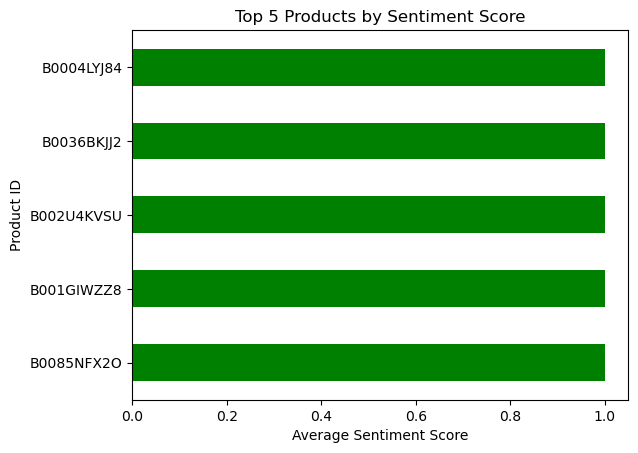

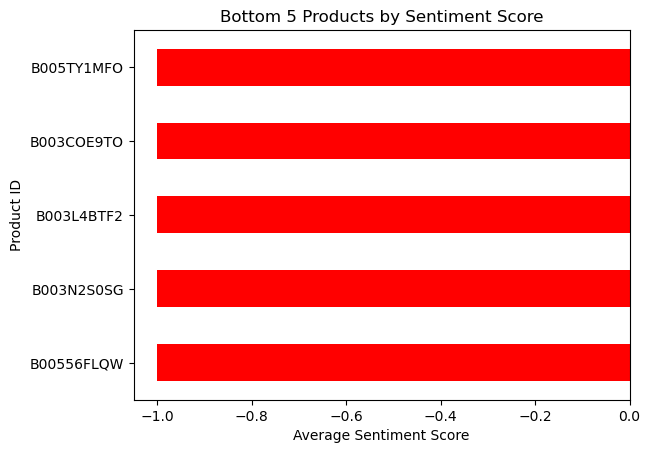

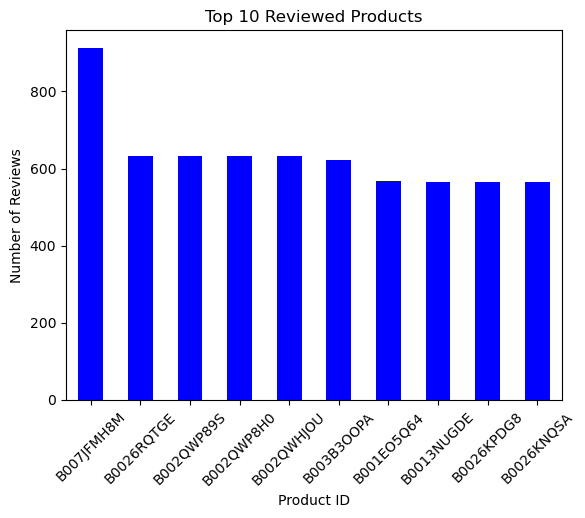

In [12]:
#Product-Based Analysis
#Product Sentiment: Which products have the best and worst sentiment scores?
#Review Count by Product: Are more reviews indicative of sales volume?


import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average sentiment value per product
average_sentiment_per_product = df.groupby('ProductId')['sentiment-value'].mean().sort_values()
# Top 5 products with the best average sentiment scores
top_products = average_sentiment_per_product.tail(5)
top_products.plot(kind='barh', color='green')
plt.title('Top 5 Products by Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product ID')
plt.show()

# Top 5 products with the worst average sentiment scores
worst_products = average_sentiment_per_product.head(5)
worst_products.plot(kind='barh', color='red')
plt.title('Bottom 5 Products by Sentiment Score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Product ID')
plt.show()


# Count the number of reviews per product
review_count_per_product = df['ProductId'].value_counts()

# Plot the review count by product
# Assuming a large number of products, we'll plot the top 10 products with the most reviews
top_reviewed_products = review_count_per_product.head(10)
top_reviewed_products.plot(kind='bar', color='blue')
plt.title('Top 10 Reviewed Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


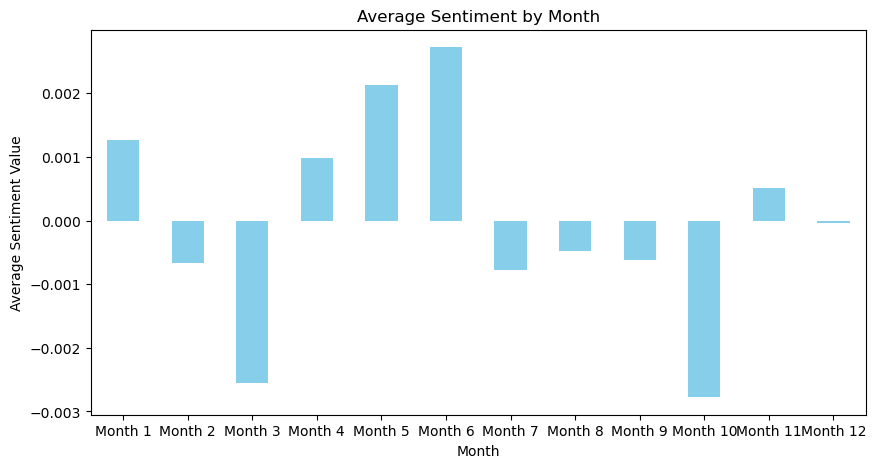

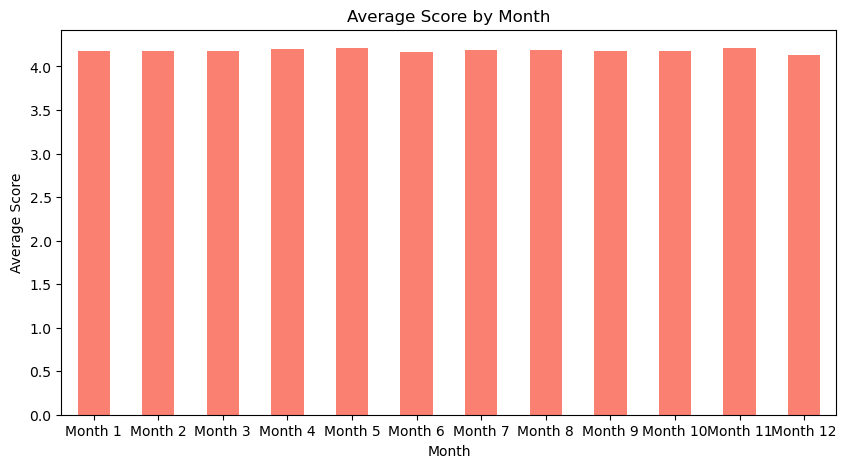

In [13]:
#Time Series Analysis
#Seasonality: Do certain times of the year affect sentiment or score?


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the dataset and it includes a 'Time' datetime column

# Ensure 'Time' is a datetime type (if not already converted earlier)
df['Time'] = pd.to_datetime(df['Time'])

# Extract month from the 'Time' column for seasonal analysis
df['Month'] = df['Time'].dt.month

# Calculate average sentiment and score by month
monthly_sentiment = df.groupby('Month')['sentiment-value'].mean()
monthly_score = df.groupby('Month')['Score'].mean()

# Plot average sentiment by month
plt.figure(figsize=(10, 5))  # Optional: Adjusting the size for better readability
monthly_sentiment.plot(kind='bar', color='skyblue', title='Average Sentiment by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Value')
plt.xticks(ticks=range(len(monthly_sentiment.index)), labels=[f'Month {i+1}' for i in range(len(monthly_sentiment.index))], rotation=0)  # Customize x-axis labels
plt.show()

# Plot average score by month
plt.figure(figsize=(10, 5))  # Optional: Adjusting the size for better readability
monthly_score.plot(kind='bar', color='salmon', title='Average Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.xticks(ticks=range(len(monthly_score.index)), labels=[f'Month {i+1}' for i in range(len(monthly_score.index))], rotation=0)  # Customize x-axis labels
plt.show()


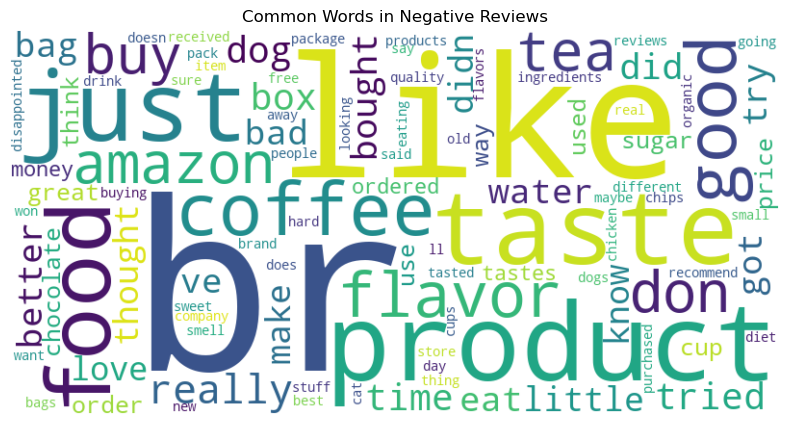

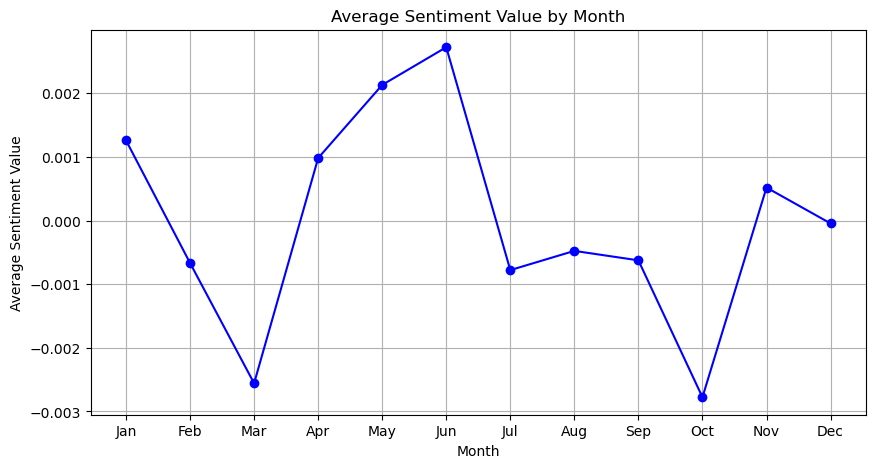

Marketing Strategy Recommendations:
Consider intensifying marketing efforts during 6, 5, 1 when customer sentiment is highest.


In [16]:
#if you find that a particular feature of a product is frequently mentioned in negative reviews, that feedback could be used for product improvement.
#Or if you find a seasonal trend in review sentiment, marketing efforts could be adjusted accordingly.


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Assuming 'df' has a 'sentiment-value' and 'Score' column, alongside 'Text' for the review body.

# Define a threshold for negative sentiment or use scores
NEGATIVE_SENTIMENT_THRESHOLD = 3  # Assuming a score below 3 is considered negative

# Filter out negative reviews
negative_reviews = df[df['Score'] < NEGATIVE_SENTIMENT_THRESHOLD]

# Text analysis with CountVectorizer or WordCloud to identify common words
vec = CountVectorizer(stop_words='english', max_features=100)
X = vec.fit_transform(negative_reviews['Text'])
word_freq = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()).sum()
top_words = word_freq.sort_values(ascending=False).head(20)

# Create a WordCloud visualization for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Negative Reviews')
plt.show()

# Seasonal trends for marketing adjustments
# Assuming 'Month' is already extracted in the DataFrame
monthly_sentiment = df.groupby('Month')['sentiment-value'].mean()

# Plot seasonal trends
plt.figure(figsize=(10, 5))
monthly_sentiment.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title('Average Sentiment Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Value')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Suggestion for marketing strategy adjustment
print("Marketing Strategy Recommendations:")
peak_months = monthly_sentiment.nlargest(3).index.tolist()
print(f"Consider intensifying marketing efforts during {', '.join(map(str, peak_months))} when customer sentiment is highest.")
